# Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals :

There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Let's start!

# Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score 

import warnings
warnings.filterwarnings('ignore')


# Uploading the file :

In [2]:
#uploading the csv file provided as inp1
inp1= pd.read_csv(r"C:\Users\USER\Desktop\UpGrad\COURSE-2- Machine learning\Lead scoring case study\Leads.csv")


In [3]:
#reading the data
inp1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Inspection :

In [4]:
#Checking the shape of the data
inp1.shape

(9240, 37)

So there are *9240* entries across *37* columns. 

In [5]:
#Fetching out the column names from the dataframe
inp1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
#Checking the info of the data
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking the numerical aspects of the data
inp1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Checking for the null values present in the data
inp1.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As we can see there are quite a lot null values present in the data, let's approach them to treat and proceed further.

In [9]:
# Calculating the percentage weightage of all the null values in the data
round(100*(inp1.isnull().sum()/len(inp1.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Keeping the threshold drop value as 33.33, we can drop all the columns those having more than 33.33% of it's data as null vaues.

# Treating the null values

In [10]:
# Keeping a threshold and dropping all the columns in which greater than 3000 missing values are present i.e. >33.33%
for i in inp1.columns:
    if((100*(inp1[i].isnull().sum()/len(inp1.index))) >=33.33 ):
        inp1.drop(i, 1, inplace = True)

In [11]:
#Checking for the null count
round(100*(inp1.isnull().sum()/len(inp1.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [12]:
#Dropping 'City'& 'Country' columns as they're not a major influencing factor from a business point of view considering the given conditions

inp1.drop('City', axis=1, inplace=True)
inp1.drop('Country', axis=1, inplace=True)

In [13]:
#Checking the null count
inp1.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [14]:
#Getting value counts for all the columns present in the dataset

for col in inp1.columns:
    print('-' * 50 + col + '-' * 50 , end=' - ')
    display(inp1[col].value_counts())

--------------------------------------------------Prospect ID-------------------------------------------------- - 

21ed04dc-f9a4-41a8-9a41-16b74531ab7d    1
5198fa3f-201c-429d-9756-c21539ab6c7a    1
da04f422-9364-47ff-b6d0-be997d3e01aa    1
11af6b3a-4844-46d1-a61a-0477eba512bb    1
0c67a2d3-58d8-48ae-b350-eedf39d4fedb    1
                                       ..
ddbd7193-6d06-420f-9d52-06ed6ba68172    1
9c8f2a7b-e6f1-4b64-8959-8d3cd009228c    1
cee250f2-724f-4690-8e6d-8f3932a07f1e    1
459860d2-d235-4ca6-9ff1-700dd01f33cd    1
9ef53cf8-8082-434d-b6f8-5fd010533023    1
Name: Prospect ID, Length: 9240, dtype: int64

--------------------------------------------------Lead Number-------------------------------------------------- - 

655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64

--------------------------------------------------Lead Origin-------------------------------------------------- - 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

--------------------------------------------------Lead Source-------------------------------------------------- - 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

--------------------------------------------------Do Not Email-------------------------------------------------- - 

No     8506
Yes     734
Name: Do Not Email, dtype: int64

--------------------------------------------------Do Not Call-------------------------------------------------- - 

No     9238
Yes       2
Name: Do Not Call, dtype: int64

--------------------------------------------------Converted-------------------------------------------------- - 

0    5679
1    3561
Name: Converted, dtype: int64

--------------------------------------------------TotalVisits-------------------------------------------------- - 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

--------------------------------------------------Total Time Spent on Website-------------------------------------------------- - 

0       2193
60        19
127       18
75        18
74        18
        ... 
620        1
628        1
684        1
724        1
1975       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

--------------------------------------------------Page Views Per Visit-------------------------------------------------- - 

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

--------------------------------------------------Last Activity-------------------------------------------------- - 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

--------------------------------------------------Specialization-------------------------------------------------- - 

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

--------------------------------------------------How did you hear about X Education-------------------------------------------------- - 

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

--------------------------------------------------What is your current occupation-------------------------------------------------- - 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

--------------------------------------------------What matters most to you in choosing a course-------------------------------------------------- - 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

--------------------------------------------------Search-------------------------------------------------- - 

No     9226
Yes      14
Name: Search, dtype: int64

--------------------------------------------------Magazine-------------------------------------------------- - 

No    9240
Name: Magazine, dtype: int64

--------------------------------------------------Newspaper Article-------------------------------------------------- - 

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

--------------------------------------------------X Education Forums-------------------------------------------------- - 

No     9239
Yes       1
Name: X Education Forums, dtype: int64

--------------------------------------------------Newspaper-------------------------------------------------- - 

No     9239
Yes       1
Name: Newspaper, dtype: int64

--------------------------------------------------Digital Advertisement-------------------------------------------------- - 

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

--------------------------------------------------Through Recommendations-------------------------------------------------- - 

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

--------------------------------------------------Receive More Updates About Our Courses-------------------------------------------------- - 

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

--------------------------------------------------Update me on Supply Chain Content-------------------------------------------------- - 

No    9240
Name: Update me on Supply Chain Content, dtype: int64

--------------------------------------------------Get updates on DM Content-------------------------------------------------- - 

No    9240
Name: Get updates on DM Content, dtype: int64

--------------------------------------------------Lead Profile-------------------------------------------------- - 

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

--------------------------------------------------I agree to pay the amount through cheque-------------------------------------------------- - 

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

--------------------------------------------------A free copy of Mastering The Interview-------------------------------------------------- - 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

--------------------------------------------------Last Notable Activity-------------------------------------------------- - 

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [15]:
#Inspecting the ('Specialization')'s value counts
inp1.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#Inspecting the ('How did you hear about X Education')'s value counts
inp1['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
#Inspecting the ('Lead Profile')'s value counts
inp1['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
#Dropping the columns 'How did you hear about X Education' and 'Lead Profile' as they contains most of the data as 'Select' which is of no use as of now
inp1.drop('How did you hear about X Education', axis=1, inplace=True)
inp1.drop('Lead Profile', axis=1, inplace=True)

In [19]:
#Checking the null count
inp1.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
X Education Forums                                  0
A free copy of Mastering The Interview              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                    

**Moving ahead for a basic visualization to fetch few important insights before dropping further variables.**

# Basic EDA :

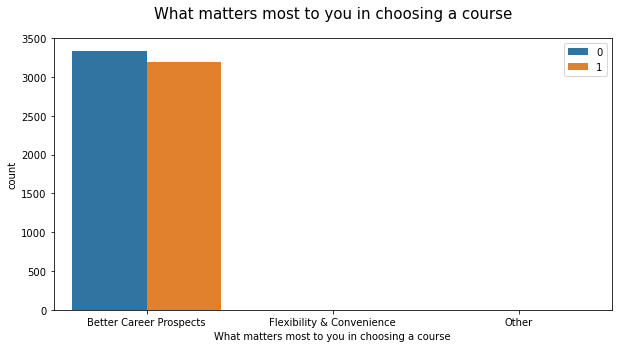

In [20]:
#Visualizing categorical column 'What matters most to you in choosing a course' against the target variable 'Converted'
plt.figure(figsize = (10,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('What matters most to you in choosing a course', y=1.05, fontsize=15);

Clearly, most of the approaches that later converted were having the intention of having **'Better Career Prospect'** through the courses in the platform.

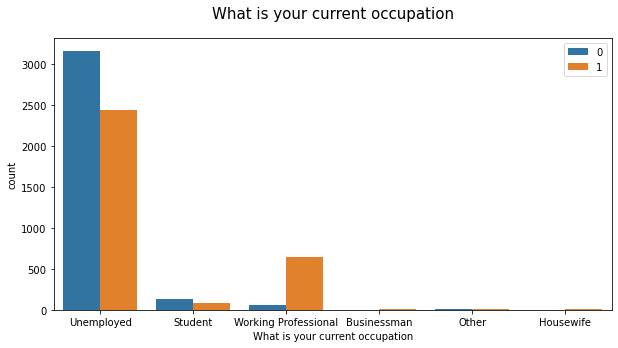

In [21]:
#Visualizing categorical column 'What is your current occupation' against the target variable 'Converted'

plt.figure(figsize = (10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('What is your current occupation', y=1.05, fontsize=15);

Most of the approaches that later converted were **'Unemployed'**. Clearly, they might be looking for an upskill through the courses in the platform to become more employable in the future.

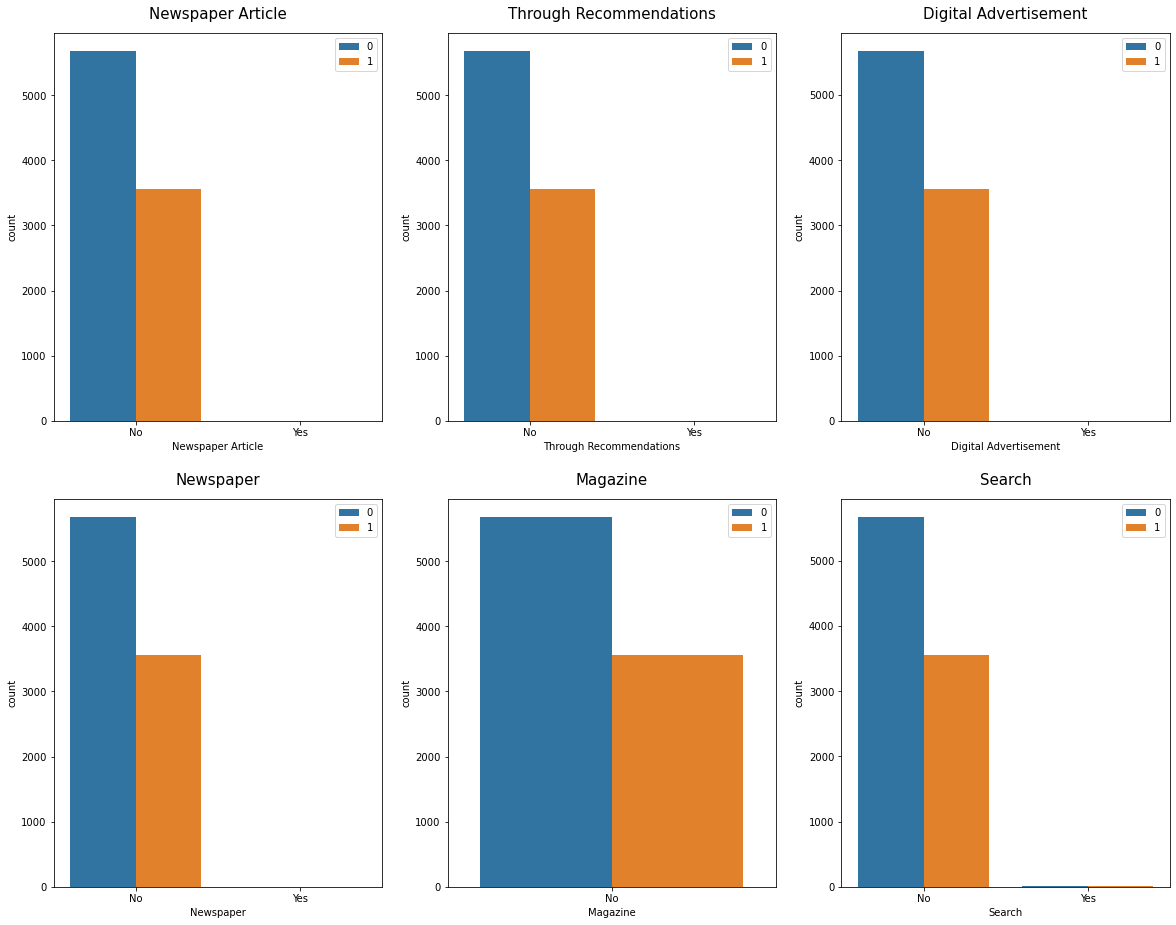

In [22]:
#Visualizing categorical columns of Ad Sources of the company seen by the customers against the target variable 'Converted'

plt.figure(figsize = (20,50))

plt.subplot(6,3,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('Newspaper Article', y=1.02, fontsize=15)

plt.subplot(6,3,2)
sns.countplot(x='Through Recommendations', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('Through Recommendations', y=1.02, fontsize=15)

plt.subplot(6,3,3)
sns.countplot(x='Digital Advertisement', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('Digital Advertisement', y=1.02, fontsize=15)

plt.subplot(6,3,4)
sns.countplot(x='Newspaper', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('Newspaper', y=1.02, fontsize=15)

plt.subplot(6,3,5)
sns.countplot(x='Magazine', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('Magazine', y=1.02, fontsize=15)

plt.subplot(6,3,6)
sns.countplot(x='Search', hue='Converted', data= inp1).tick_params(axis='x')
plt.legend(loc="upper right")
plt.title('Search', y=1.02, fontsize=15);

Clearly, most of the approaches converted in paying for the course. So, we can inferr that the ads that were run on these various platforms had a good impact in conversion.

## Dropping few columns further :

In [23]:
#As we can see that there were many columns with repsonses in No/Yes, let's drop the ones that are with almost all the responses as 'No'

inp1.drop(['Do Not Call', 'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace = True)

Dropped the columns *'Do Not Call', 'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'*

In [24]:
#Dropping 'What matters most to you in choosing a course'

inp1.drop(['What matters most to you in choosing a course'], axis=1,inplace=True)

Dropped the column *What matters most to you in choosing a course* as most of it's responses were having the single response i.e **'Better Career Prospect'** which is not useful for further analysis 

In [25]:
#Checking the null count

inp1.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [26]:
#Deleting the null rows from the column 'What is your current occupation'

inp1=inp1[-pd.isnull(inp1['What is your current occupation'])]

In [27]:
#Checking the null count

inp1.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [28]:
#Deleting the null rows from the column 'TotalVisits'

inp1=inp1[-pd.isnull(inp1['TotalVisits'])]

In [29]:
#Checking the null count

inp1.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
#Deleting the null rows from the column 'Lead Source'

inp1=inp1[-pd.isnull(inp1['Lead Source'])]

In [31]:
#Checking the null count

inp1.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [32]:
#Deleting the null rows from the column 'Specialization'

inp1=inp1[-pd.isnull(inp1['Specialization'])]

In [33]:
#Checking the null count

inp1.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Finally, there are no null values present in the dataset. We can move further now.

In [34]:
#Checking the present dataset shape
inp1.shape

(6373, 14)

So, now we are left with 6393 entries across 14 variables

In [35]:
#Checking the change in filtered dataset
print(len(inp1.index))
print(len(inp1.index)/9240)

6373
0.6897186147186147


We still have around 69% of the rows to move ahead with, which seems good enough.

In [36]:
#Checking the dataset again
inp1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [37]:
#Dropping off 'Prospect ID', 'Lead Number' as they do not explain any business insight

inp1.drop(['Prospect ID', 'Lead Number'], axis=1,inplace=True)

In [38]:
#checking the dataset 
inp1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Correlation among final variables:

In [39]:
#Understanding few numerical inpects of the present dataset
inp1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.480935,3.624196,535.224541,2.480464
std,0.499676,5.048555,565.374753,2.167364
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.000000,3.500000
max,1.000000,251.000000,2272.000000,55.000000


In [40]:
#getting the correlation 
inp1.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.005651,0.313338,-0.063362
TotalVisits,0.005651,1.000000,0.202551,0.489039
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000


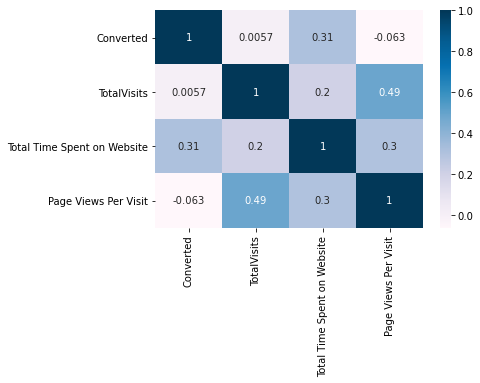

In [41]:
#visualising the correlation by plotting a heatmap

sns.heatmap(inp1.corr(), cmap='PuBu', annot=True);

_______________________________________________________________________________________________________________________________

# Creating Dummy variables :

In [42]:
#Fetching the categorical columns to create the dummies

cat_columns=inp1.loc[:,inp1.dtypes=='object']
cat_columns.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
# Creating dummy variables 
dummy_df = pd.get_dummies(inp1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [44]:
# Concating the dummy variables 
inp1=pd.concat([inp1, dummy_df], axis=1)

In [45]:
# Creating dummy variables separately for column ''Specialization' and dropping the ones with 'Select' as reponse


dummyforspecialization = pd.get_dummies(inp1['Specialization'], prefix = 'Specialization')
dummyforspecialization = dummyforspecialization.drop(['Specialization_Select'], 1)


In [46]:
#Concating the above dummies
inp1=pd.concat([inp1, dummyforspecialization], axis=1)

In [47]:
#Checking the dataset
inp1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Dropping all the variables for which the dummy variables were created

inp1 = inp1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [49]:
#Checking the dataset
inp1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split :

In [50]:
#Putting the target variable 'Converted' in y

y = inp1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
#Putting all the other variables other than 'Converted' in X
X=inp1.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Splitting the dataset into X/Y train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling the vaiables : 

Few of the numeric variables present in the dataset needs to be scaled. So let's go ahead and scale these variables.

In [53]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits', 'Page Views Per Visit']])


In [54]:
#Checking the X_train
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Checking the correlation for X_train
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
TotalVisits,1.000000,0.180396,0.435633,0.253439,-0.201371,-0.040149,0.069662,-0.040149,0.079346,-0.014172,...,0.018576,0.029421,-0.005065,0.041375,0.013192,0.004456,0.076798,0.026402,0.081599,0.053059
Total Time Spent on Website,0.180396,1.000000,0.317382,0.271853,-0.254398,-0.056578,0.112708,-0.056578,0.232249,-0.019972,...,0.020717,0.013033,0.054701,0.050156,0.054325,0.032314,0.017783,0.013438,0.036675,0.034180
Page Views Per Visit,0.435633,0.317382,1.000000,0.481898,-0.367005,-0.072056,0.103034,-0.072056,0.206739,-0.025436,...,0.063053,0.064399,0.029195,0.077295,0.040201,0.023451,0.027137,0.029267,0.052635,0.101226
Lead Origin_Landing Page Submission,0.253439,0.271853,0.481898,1.000000,-0.367172,-0.068330,0.504456,-0.068330,0.077192,-0.024120,...,0.143126,0.089828,0.087931,0.096703,0.093663,0.072809,0.053317,0.045601,0.108103,0.089308
Lead Origin_Lead Add Form,-0.201371,-0.254398,-0.367005,-0.367172,1.000000,-0.019342,-0.206074,-0.019342,-0.219566,0.065693,...,-0.043389,-0.039341,0.013114,-0.044722,-0.031309,-0.026390,-0.030276,-0.016743,-0.030714,-0.043358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.004456,0.032314,0.023451,0.072809,-0.026390,-0.007295,0.021212,-0.007295,0.020824,-0.002575,...,-0.026206,-0.018694,-0.041480,-0.018787,-0.030313,1.000000,-0.011420,-0.006315,-0.024862,-0.018319
Specialization_Rural and Agribusiness,0.076798,0.017783,0.027137,0.053317,-0.030276,-0.005634,0.035485,-0.005634,-0.033469,-0.001989,...,-0.020239,-0.014438,-0.032036,-0.014509,-0.023411,-0.011420,1.000000,-0.004877,-0.019201,-0.014148
Specialization_Services Excellence,0.026402,0.013438,0.029267,0.045601,-0.016743,-0.003116,0.043100,-0.003116,-0.026359,-0.001100,...,-0.011193,-0.007984,-0.017716,-0.008024,-0.012947,-0.006315,-0.004877,1.000000,-0.010618,-0.007824
Specialization_Supply Chain Management,0.081599,0.036675,0.052635,0.108103,-0.030714,0.006840,0.078224,0.006840,-0.015423,-0.004330,...,-0.044063,-0.031432,-0.069746,-0.031588,-0.050968,-0.024862,-0.019201,-0.010618,1.000000,-0.030802


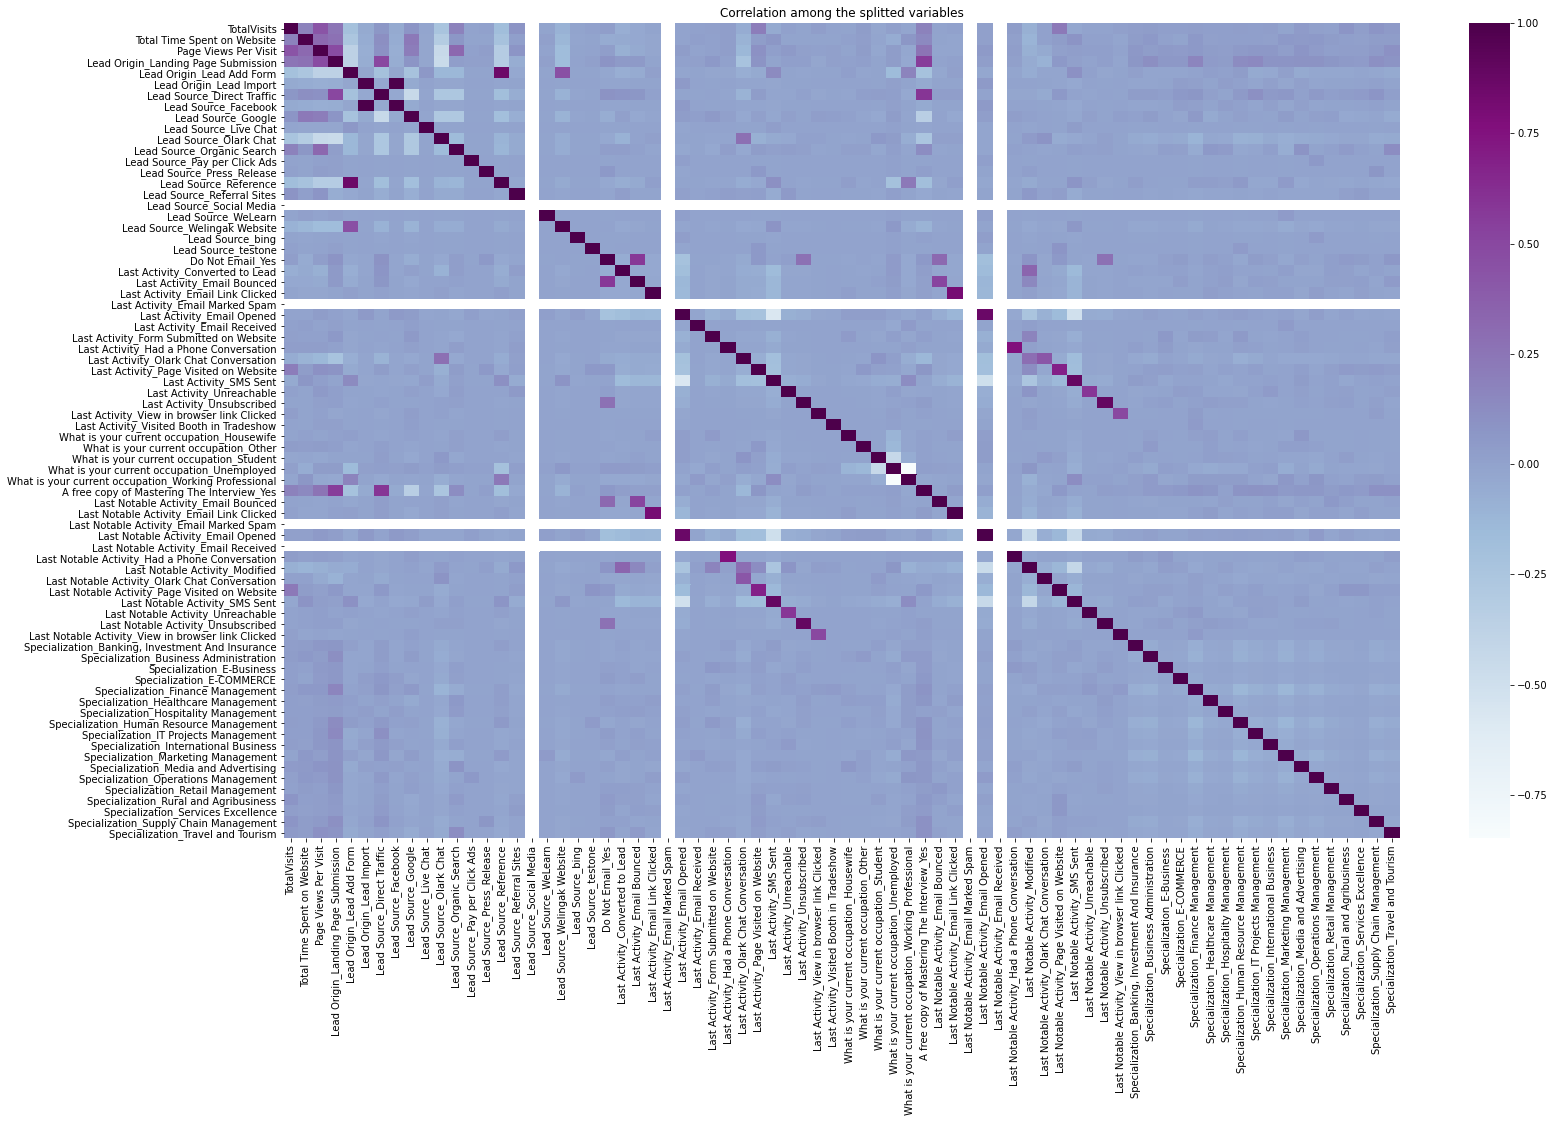

In [56]:
#Plotting the X_train's correlation on a heatmap

plt.figure(figsize=(25,15))
plt.title('Correlation among the splitted variables')
sns.heatmap(X_train.corr(), cmap='BuPu');

# Building the model :

In [57]:
#creating an object
logreg=LogisticRegression()

In [58]:
# IIntroducing RFE and selecting 15 variables
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [60]:
# looking at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [61]:
# Putting all the columns selected by RFE in a variable 'col'

col = X_train.columns[rfe.support_]
col


Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

## Models :

### Model 1


In [62]:
# Fitting a logistic Regression model on X_train after adding a constant for a summary
X_train_1=sm.add_constant(X_train[col]) 
logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())
res=logis1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Wed, 08 Dec 2021   Deviance:                       4145.5
Time:                        20:45:43   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

### VIF :

In [63]:
# Making a VIF dataframe
X_train_1=X_train_1.drop(['const'],1)
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


**Dropping the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.**

In [64]:
X_train_2=X_train_1.drop(['Lead Source_Reference'],1)

### Model - 2

In [65]:
#Refitting the model
X_train_2=sm.add_constant(X_train_2) 
logis2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial())
res=logis2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Wed, 08 Dec 2021   Deviance:                       4146.5
Time:                        20:45:44   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

### VIF :


In [66]:
X_train_2=X_train_2.drop(['const'],1)
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


Although with a decent VIF, dropping the variable `Last Notable Activity_Had a Phone Conversation` since it has a high p-value.

In [67]:
X_train_3=X_train_2.drop(['Last Notable Activity_Had a Phone Conversation'],1)

## Model 3

In [68]:
#Refitting the model
X_train_3=sm.add_constant(X_train_3) 
logis2=sm.GLM(y_train,X_train_3,family=sm.families.Binomial())
res=logis2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Wed, 08 Dec 2021   Deviance:                       4152.2
Time:                        20:45:44   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

### VIF :

In [69]:
X_train_3=X_train_3.drop(['const'],1)
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


Although with a decent VIF, dropping the variable `What is your current occupation_Housewife` since it has a high p-value

In [70]:
X_train_4=X_train_3.drop(['What is your current occupation_Housewife'],1)

### Model 4

In [71]:
X_train_4=sm.add_constant(X_train_4) 
logis2=sm.GLM(y_train,X_train_4,family=sm.families.Binomial())
res=logis2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Wed, 08 Dec 2021   Deviance:                       4156.7
Time:                        20:45:44   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

### VIF :

In [72]:
X_train_4=X_train_4.drop(['const'],1)
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.09


Dropping the variable `What is your current occupation_Working Professional	` since it has a high p-value

In [73]:
X_train_5=X_train_4.drop(['What is your current occupation_Working Professional'],1)

### Final model :

In [74]:
X_train_5=sm.add_constant(X_train_5) 
logis2=sm.GLM(y_train,X_train_5,family=sm.families.Binomial())
res=logis2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Wed, 08 Dec 2021   Deviance:                       4158.1
Time:                        20:45:45   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

### VIF:

In [75]:
X_train_5=X_train_5.drop(['const'],1)
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


So, the above was our final model. Now, moving ahead to evaluate it further.

# Model Evaluation :

In [76]:
# Using 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train_5))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [77]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [78]:
# Creating a new dataframe containing the actual conversion flag and all the probabilities being predicted by the model

y_train_finalpred = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_finalpred.head()

,Converted,Conversion_Probability
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


#### Creating a new column as 'Predicted' containing 1 if Conversion_Probability > 0.5 else 0

In [79]:
y_train_finalpred['Predicted']=y_train_finalpred.Conversion_Probability.map(lambda x: 1 if x>0.5 else 0)

In [80]:
#Checking the y_train_finalpred
y_train_finalpred.head()

,Converted,Conversion_Probability,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


Now that we have the probabilities and have also made conversion predictions using them, let's evaluate the model.

In [81]:
#Obtaining the confusion matrix:
conf_matrix = metrics.confusion_matrix(y_train_finalpred.Converted, y_train_finalpred.Predicted )
print(conf_matrix)

[[1929  383]
 [ 560 1589]]


In [82]:
#Checking the accuracy of the model :
print(metrics.accuracy_score(y_train_finalpred.Converted, y_train_finalpred.Predicted ))

0.7886124187401928


In [83]:
#Evaluating other metrics as well

TP = conf_matrix[1,1]   # (True positive) 
TN = conf_matrix[0,0]   # (True negatives)
FP = conf_matrix[0,1]   # (False positives)
FN = conf_matrix[1,0]   # (False negatives)

In [84]:
# Obtaining the sensitivity of our model
TP/(TP+FN)

0.739413680781759

In [85]:
# Obtaining the specificity of our model
TN/(TN+FP)

0.8343425605536332

# Fetching the Optimal Cut off for our model:

In [86]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_finalpred.Converted, y_train_finalpred.Predicted, drop_intermediate = False )

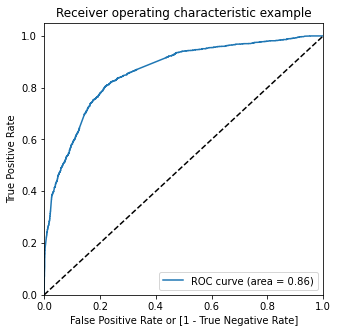

In [88]:
# Calling the ROC function
draw_roc(y_train_finalpred.Converted, y_train_finalpred.Conversion_Probability )

The area under the curve of the ROC is **0.86** which is quite good and acceptable. So, we seem to have a good model. Now,checking the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [89]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_finalpred[i]= y_train_finalpred.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_finalpred.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [90]:
# Creating a dataframe to check the accuracy, sensitivity, and specificity values at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_finalpred.Converted, y_train_finalpred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.527012     0.994416     0.092561
0.2          0.2  0.698274     0.944160     0.469723
0.3          0.3  0.767541     0.865984     0.676038
0.4          0.4  0.791975     0.810610     0.774654
0.5          0.5  0.788612     0.739414     0.834343
0.6          0.6  0.757229     0.624011     0.881055
0.7          0.7  0.735037     0.543509     0.913062
0.8          0.8  0.711500     0.453234     0.951557
0.9          0.9  0.644026     0.279665     0.982699


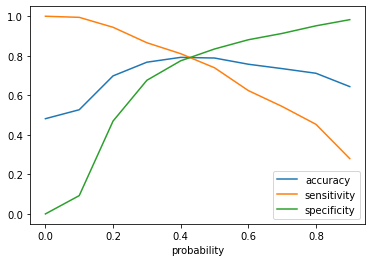

In [91]:
# Let's plot it as well

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

It's clear from the above plot that around **0.42**, you get the optimal values of the three metrics. So, let's move ahead with 0.42 as our cutoff now.

In [92]:
#Using the optimal cutoff obtained to predict
y_train_finalpred['Final_Predicted'] = y_train_finalpred.Conversion_Probability.map( lambda x: 1 if x > 0.42 else 0)
y_train_finalpred.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [93]:
#Checking the accuracy again
print(metrics.accuracy_score(y_train_finalpred.Converted, y_train_finalpred.Final_Predicted ))

0.7908540685944856


In [94]:
#Obtaining the confusion matrix again:
conf_matrix_2 = metrics.confusion_matrix(y_train_finalpred.Converted, y_train_finalpred.Final_Predicted )
print(conf_matrix_2)

[[1823  489]
 [ 444 1705]]


In [95]:
# Evaluating the other metrics again

TP = conf_matrix_2[1,1] # (True positive) 
TN = conf_matrix_2[0,0] # (True negatives)
FP = conf_matrix_2[0,1] # (False positives)
FN = conf_matrix_2[1,0] # (False negatives)

In [96]:
# Calculating the Sensitivity

TP/(TP+FN)

0.793392275476966

In [97]:
# Calculating the Specificity

TN/(TN+FP)

0.7884948096885813

# Making predictions on the test set:

In [98]:
#scaling our test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])


In [99]:
# Predicting the test dataset with our final model

test_cols=X_train_5.columns              # Taking the same columns that our final train set has
X_test_final=X_test[test_cols]               

In [100]:
# Adding a constant to the final set set

X_test_final=sm.add_constant(X_test_final)   

In [101]:
 # Predicting the final test set
    
y_pred_test=res.predict(X_test_final)      

In [102]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Conversion_Probability':y_pred_test})


In [103]:
 # visualizing the first 5 rows of the y_test_pred_final
y_test_pred_final.head()  

,Converted,Conversion_Probability
4771,1,0.996296
6122,0,0.239351
9202,0,0.786950
6570,1,0.373668
2668,1,0.859736


In [104]:
# Predicting the outcomes with probability cutoff as 0.42 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Conversion_Probability'].map(lambda x:1 if x >0.42 else 0 )  # Predicted value 
y_test_pred_final.head()

,Converted,Conversion_Probability,Predicted
4771,1,0.996296,1
6122,0,0.239351,0
9202,0,0.786950,1
6570,1,0.373668,0
2668,1,0.859736,1


### Accuracy of the model

In [105]:
#Checking the overall accuracy

metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.Predicted)

0.7599372384937239

So, the overall accuracy for our test dataset is approximately **0.76**

### Precision score:

In [106]:
# Checking the precision score

precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)   # Printing the precision score


0.7129543336439889

So, the precision score for our final model  is approximately **0.713**

### Recall score:

In [107]:
# Checking the recall score

recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)     # Printing the recall score

0.8351528384279476

So, the recall score for our final model  is approximately **0.835**

# Lead Score :

So, the recall score for our final model is approximately **00.835**

In [108]:
# Creating a new column for the lead score

y_test_pred_final['Lead Score']=y_test_pred_final['Conversion_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Conversion_Probability,Predicted,Lead Score
4771,1,0.996296,1,100
6122,0,0.239351,0,24
9202,0,0.786950,1,79
6570,1,0.373668,0,37
2668,1,0.859736,1,86


______________________________________________________________________________________________________________________________

# Conclusion :


**1)The Accuracy, Precision and Recall score we got from test set are in an aceptable range.**

**2)The recall score is higher than the precision score which is a good indicator for the model that we prepared.**


**3)Looking at the above metics we can say that the model has an ability to adjust with the company’s future requirements in coming years.**

**So, we can conclude that we do have a stable model as per th requirement now. i.e Near to 80% Accuracy.** 



Finally,Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
**1)Total Time Spent on Website**

**2)Lead Origin Lead Add Form**

and

**3)Last Activity_Had a Phone Conversation**